In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [2]:
csv_in = 'dm-end1-2.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       100 non-null    float64
 1   malic_acid                    100 non-null    float64
 2   ash                           100 non-null    float64
 3   alcalinity_of_ash             100 non-null    float64
 4   magnesium                     100 non-null    float64
 5   total_phenols                 100 non-null    float64
 6   flavanoids                    100 non-null    float64
 7   nonflavanoid_phenols          100 non-null    float64
 8   proanthocyanins               100 non-null    float64
 9   color_intensity               100 non-null    float64
 10  hue                           100 non-null    float64
 11  od280/od315_of_diluted_wines  100 non-null    float64
 12  proline                       100 non-null    float64
d

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
1,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0
2,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0
3,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0
4,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0


In [4]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
#fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='minres')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

In [5]:
df_corr = df.corr(method='pearson')
display(df_corr)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.109276,0.197212,-0.386259,0.319639,0.182181,0.115847,-0.199771,0.049547,0.543048,-0.173312,0.006689,0.632260
malic_acid,0.109276,1.000000,0.044934,0.181076,-0.053093,-0.348071,-0.443155,0.318591,-0.184094,0.221984,-0.565675,-0.416816,-0.196211
ash,0.197212,0.044934,1.000000,0.385467,0.351295,0.166349,0.154989,0.224836,0.013845,0.299820,-0.108414,-0.065699,0.284296
alcalinity_of_ash,-0.386259,0.181076,0.385467,1.000000,-0.050865,-0.323366,-0.315923,0.351356,-0.193215,0.012424,-0.216412,-0.313647,-0.435661
magnesium,0.319639,-0.053093,0.351295,-0.050865,1.000000,0.273029,0.250578,-0.250084,0.312434,0.255661,-0.039698,0.019717,0.414067
total_phenols,0.182181,-0.348071,0.166349,-0.323366,0.273029,1.000000,0.886277,-0.448168,0.674152,-0.112463,0.445056,0.711549,0.490057
flavanoids,0.115847,-0.443155,0.154989,-0.315923,0.250578,0.886277,1.000000,-0.541176,0.663251,-0.224391,0.520052,0.779763,0.457819
nonflavanoid_phenols,-0.199771,0.318591,0.224836,0.351356,-0.250084,-0.448168,-0.541176,1.000000,-0.366943,0.117135,-0.179504,-0.467928,-0.258620
proanthocyanins,0.049547,-0.184094,0.013845,-0.193215,0.312434,0.674152,0.663251,-0.366943,1.000000,-0.149899,0.329573,0.538021,0.317228
color_intensity,0.543048,0.221984,0.299820,0.012424,0.255661,-0.112463,-0.224391,0.117135,-0.149899,1.000000,-0.574851,-0.477353,0.304028


In [6]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0     4.675266
1     2.661995
2     1.502157
3     0.962988
4     0.800519
5     0.613692
6     0.510915
7     0.343434
8     0.257142
9     0.230728
10    0.211005
11    0.141841
12    0.088318
dtype: float64
0     4.313771
1     2.198448
2     0.756276
3     0.373053
4     0.153340
5     0.130365
6     0.043911
7    -0.037968
8    -0.067239
9    -0.220134
10   -0.298436
11   -0.355662
12   -0.549536
dtype: float64


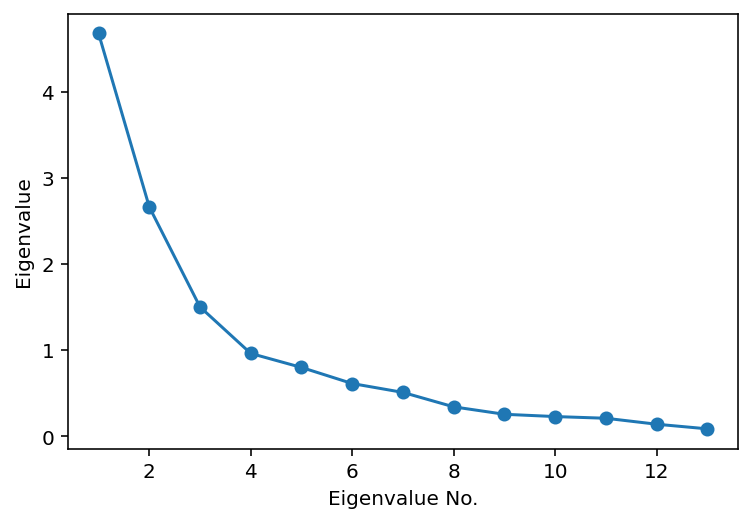

In [7]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
loadings = fa.loadings_
columns=['Factor1','Factor2']
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=columns)
display(df_loadings)

,Factor1,Factor2
alcohol,0.004626,0.705436
malic_acid,-0.482820,0.092938
ash,0.030814,0.396964
alcalinity_of_ash,-0.329402,-0.198586
magnesium,0.166408,0.470725
total_phenols,0.870101,0.304166
flavanoids,0.936205,0.204489
nonflavanoid_phenols,-0.524726,-0.145050
proanthocyanins,0.669845,0.169614
color_intensity,-0.418911,0.782887


In [9]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=columns)
print(df_scores.shape)
display(df_scores.head())

(100, 2)


,Factor1,Factor2
0,-0.230816,-0.958616
1,-0.736088,-0.392105
2,0.818396,0.315634
3,-1.222774,0.982182
4,0.193874,-1.222523


In [10]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

alcohol                         0.502338
malic_acid                      0.758248
ash                             0.841470
alcalinity_of_ash               0.852058
magnesium                       0.750726
total_phenols                   0.150407
flavanoids                      0.081705
nonflavanoid_phenols            0.703623
proanthocyanins                 0.522539
color_intensity                 0.211601
hue                             0.476135
od280/od315_of_diluted_wines    0.241797
proline                         0.467164
dtype: float64


In [11]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=columns)
display(df_fa_var)

,Factor1,Factor2
var,4.202663,2.237526
prop_var,0.323282,0.172117
cum_var,0.323282,0.495399


In [12]:
# slightly modified from biplot() in pca_and_biplot.ipynb of DM-08
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.5
    r2 = 1.01
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=20)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

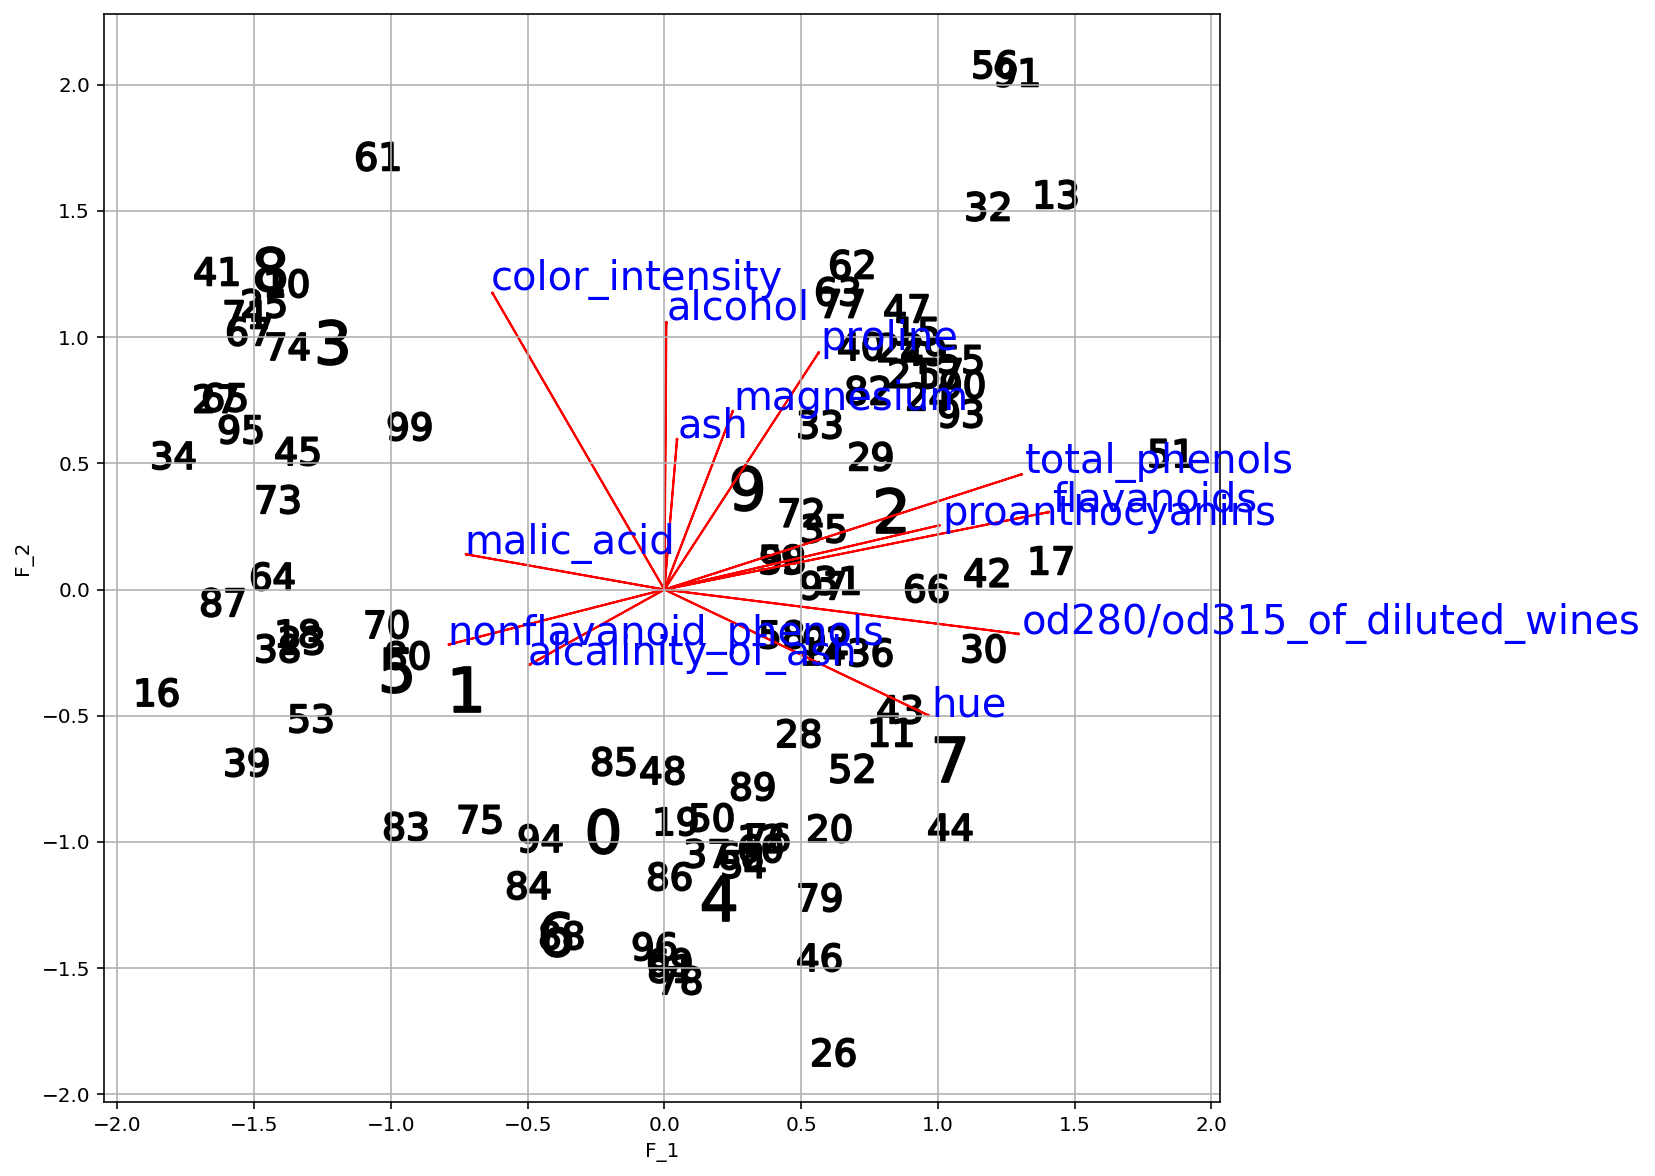

In [13]:
biplot_fa(scores, loadings, load_labels=df.columns)